# Example of the LaplacianModel

To give a demonstration of the LaplacianModel class. I simulated 1,000 $X_i$ data points, where $X_i \sim N(0, 9)$. I then created 1,000 target variables, $y_i$, where $y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ and $\epsilon_i \overset{\text{iid}}{\sim} \text{Laplace}(0, b)$. Therefore, $y_i \sim Laplace(\beta_0 + \beta_1 X_i, b)$. In this test, $\beta_0 = 1$, $\beta_1 = 2$, and $b = 1$. 

An estimate for $b$ must be supplied to the class when initialized. An estimate of $b$ can be obtained from a least absolute deviation (LAD) regression for Laplace distributed data.

### Data is generated in the cell below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from BayesianLinearRegression import LaplacianModel

# Set a random seed for repoducibility.
random_seed = 1
np.random.seed(random_seed)

# Set the intercept and slope of the simulated data
intercept = 1
slope = 2

# Define a function to describe the simulated data generating process.
def my_line(intercept, slope, X):
    return intercept + slope*X

# Draw 1000 values of X ~ N(0, 3).
X = np.random.normal(loc=0, scale=3, size=1000)
# Create y data equal to intercept + slope*X + e, where e ~ Laplace(0, 1).
y =  my_line(intercept, slope, X) + np.random.laplace(size=X.shape[0])
# Reshape X and y to be column vectors.
X = X.reshape((-1,1))
y = y.reshape((-1, 1))

A LaplacianModel object is created below and it's *fit* method is used to simulate the posterior distributions of the coefficients. The predict *method* is demonstrated as well.

In [2]:
# We know the scale of y is 1, so we do not need to estimate it
# with a model, such as Least Absolute Deviations Regression.
y_scale = 1
# Create an instance of the LaplacianModel class.
laplacian_model = LaplacianModel(y_scale)

# Set the prior means and standard deviations of the two coefficients whose
# posterior distributions we will simulate.
prior_means = np.repeat(0.0, 2)
prior_stds = np.repeat(1, 2)
# Set the standard deviations of the jumping distributions for each 
# coefficient.
jumping_stds = np.repeat(0.01, 2)
# Set the number of iterations to use in the Metropolis-Hastings posterior
# simulation process.
n_iter = 30000
# We are adding an intercept to the input data.
add_intercept = True
# Use the median of the posterior distributions as the point estimate of the
# coefficients.
method = "median"
# Burn-in the first 10% of the samples.
burn_in = 0.1
# Set alpha to 0.05 because we are interested in the 95% credible intervals of
# the coefficients.
alpha = 0.05

# Simulate the posterior distributions of the coefficients and fit the 
# regression model.
laplacian_model.fit(y,
                    X,
                    prior_means,
                    prior_stds,
                    jumping_stds, 
                    n_iter,
                    add_intercept,
                    method,
                    burn_in,
                    alpha,
                    random_seed)

# Use the fitted model to predict y.
predicted_y = laplacian_model.predict(X)

100%|██████████| 30000/30000 [01:18<00:00, 382.80it/s]


The medians of the posterior distributions of the coefficients are very close to their true values. The 95% credible intervals are displayed as well.

A plot of the simulated joint distribution of the coefficients and a scatter plot of the data with the regression line and true line overlain are below.

In [3]:
print(f"{method} of the simulated posterior of the intercept: "
      f"{round(laplacian_model._beta_hat[0][0], 4)}; true value: {intercept}")
print(f"{method} of the simulated posterior of the slope: "
      f"{round(laplacian_model._beta_hat[1][0], 4)}; true value: {slope}")
print()
print(f"{100*(1-alpha)}% Credible Interval for the intercept: "
      f"{tuple(laplacian_model._credible_intervals[0])}")
print(f"{100*(1-alpha)}% Credible Interval for the slope: "
      f"{tuple(laplacian_model._credible_intervals[1])}")

median of the simulated posterior of the intercept: 1.033; true value: 1
median of the simulated posterior of the slope: 1.9901; true value: 2

95.0% Credible Interval for the intercept: (0.9729828628341136, 1.091919008818363)
95.0% Credible Interval for the slope: (1.9712044219243803, 2.0119507784088424)


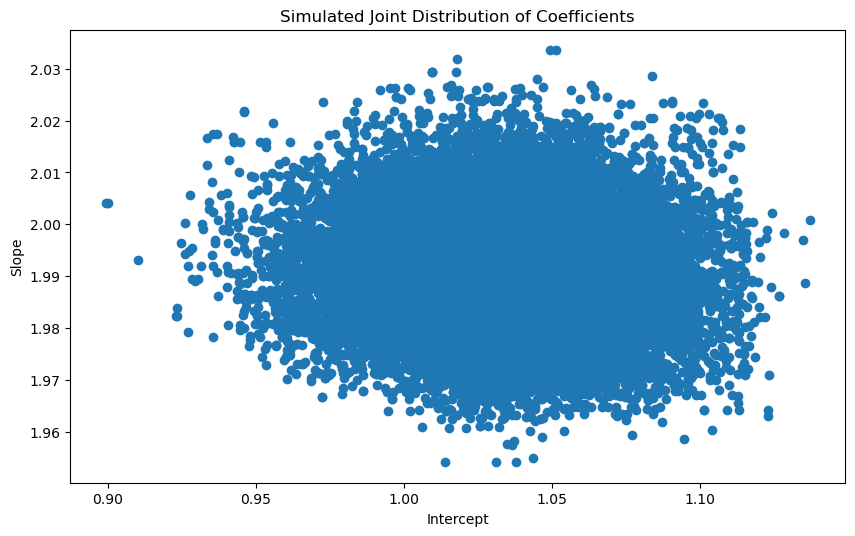

In [4]:
# Plot the simulated joint distribution of the two coefficients.
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(laplacian_model._beta_distribution[0], 
            laplacian_model._beta_distribution[1])
plt.title('Simulated Joint Distribution of Coefficients')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.show()

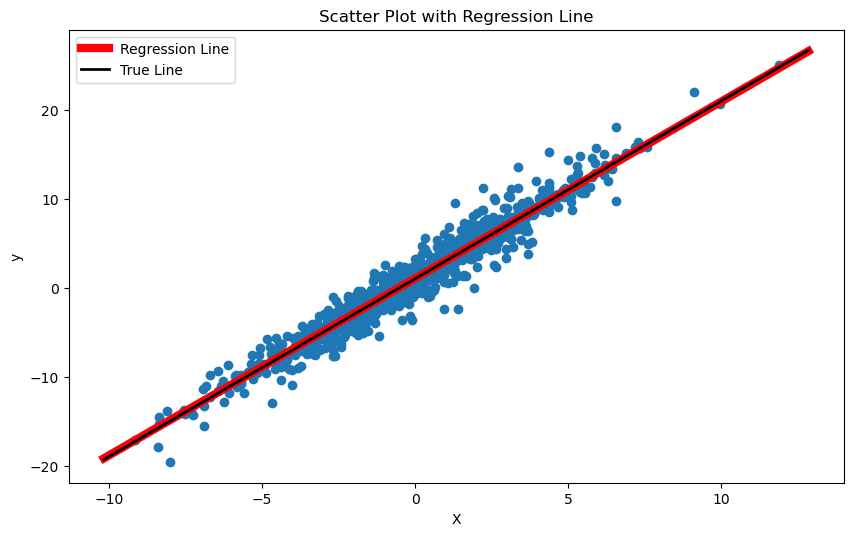

In [5]:
# Create an array covering the range of the X data.
X_range = np.arange(X.min()-1, X.max()+1, 1)
# Use the values covering the range of X to make the regression line.
regression_line = laplacian_model.predict(X_range.reshape((-1,1)))
# Use the my_line function to make the true line.
true_line = my_line(intercept, slope, X_range)

# Plot the regression line against the data and true line.
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(X, y)
plt.plot(X_range, regression_line, 
         linewidth=6, color="red", label="Regression Line")
plt.plot(X_range, true_line, 
         linewidth=2, color="black", label="True Line")
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc="upper left")
plt.show()